<h1>Histograms and Joint Plots in Seaborn</h1>

&bigstar;&bigstar; The <b>Histogram</b> is a popular graphing tool. It is used <b>to summarize <ins>discrete or continuous data</ins> that are measured on an interval scale</b>. It is often used to illustrate the major features of the distribution of the data in a convenient form.
    
&bigstar;&bigstar; The <b>Joint Plot</b> is used <b>to quickly visualize and analyze the relationship <ins>between two variables</ins> and <ins>describe their individual distributions</ins> on the <ins>same plot</ins></b>.

It combines a scatterplot (interal) with a per-axis-histogram (external). 

<hr/>

<h2>Importing Seaborn, Numpy, Matplotlib, and <a href='https://raw.githubusercontent.com/selva86/datasets/master/diamonds.csv'>Dataset</a></h2>

For this section, we'll be using the <ins>diamond.csv</ins> dataset found <a href='https://raw.githubusercontent.com/selva86/datasets/master/diamonds.csv'>here</a>.

In [36]:
import warnings
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

df = pd.read_csv('https://raw.githubusercontent.com/selva86/datasets/master/diamonds.csv')

<hr/>

<h2>Dataset EDA</h2>

<b><ins>Checking for the following</ins></b>:

1. #### Data Insights:
* Total volume of data
* Structure and Layout
* Column Names
* Null values
* Statistical significance

2. #### Cleaning, Formatting, and Normalizing
* Replacing null values (if applicable)
* Establishing unique index (if applicable)
* Adjusting case and text structure (if applicable)
* Dealing with outlier values (if applicable)

3. #### Analyzing Relationships Between Data
* Histogram Plotting
* Joint Plotting

In [22]:
#Check data structure:
df.head(1)

,carat,cut,color,clarity,depth,table,price,x,y,z
0,0.23,Ideal,E,SI2,61.5,55.0,326,3.95,3.98,2.43


In [23]:
#Check dataset volume:
rows,cols = df.shape
print(f'Rows: {rows}, Cols: {cols}')

Rows: 53940, Cols: 10


In [24]:
#Check for null values: 
df.isnull().sum()

carat      0
cut        0
color      0
clarity    0
depth      0
table      0
price      0
x          0
y          0
z          0
dtype: int64

In [25]:
#Check statistical significance:
df.describe()

,carat,depth,table,price,x,y,z
count,53940.000000,53940.000000,53940.000000,53940.000000,53940.000000,53940.000000,53940.000000
mean,0.797940,61.749405,57.457184,3932.799722,5.731157,5.734526,3.538734
std,0.474011,1.432621,2.234491,3989.439738,1.121761,1.142135,0.705699
min,0.200000,43.000000,43.000000,326.000000,0.000000,0.000000,0.000000
25%,0.400000,61.000000,56.000000,950.000000,4.710000,4.720000,2.910000
50%,0.700000,61.800000,57.000000,2401.000000,5.700000,5.710000,3.530000
75%,1.040000,62.500000,59.000000,5324.250000,6.540000,6.540000,4.040000
max,5.010000,79.000000,95.000000,18823.000000,10.740000,58.900000,31.800000


In [26]:
#No changes needed. 
df.head()

,carat,cut,color,clarity,depth,table,price,x,y,z
0,0.23,Ideal,E,SI2,61.5,55.0,326,3.95,3.98,2.43
1,0.21,Premium,E,SI1,59.8,61.0,326,3.89,3.84,2.31
2,0.23,Good,E,VS1,56.9,65.0,327,4.05,4.07,2.31
3,0.29,Premium,I,VS2,62.4,58.0,334,4.20,4.23,2.63
4,0.31,Good,J,SI2,63.3,58.0,335,4.34,4.35,2.75


<hr/>

<h2>1. Histogram Plotting</h2>

When plotting a histogram, you can use any of the <b>sns</b>.`histplot() | displot() | distplot()` callers. 

The parameters `hist=` and `kde=` are selectors for the boxes and frequency curve, respectively. 

The <code>bin=</code> parameter increases or reduces the number of boxes shown. 

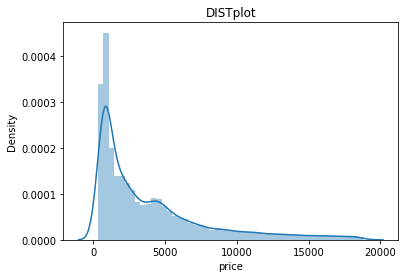

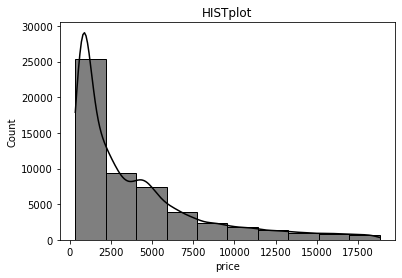

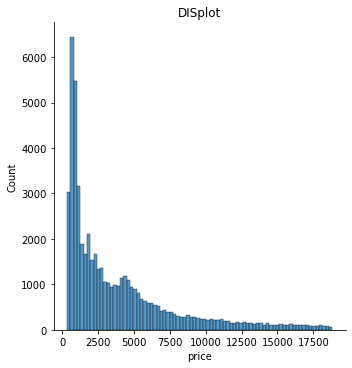

In [48]:
#Ignore the 'FutureWarning: Depreciated Function' warning:
warnings.filterwarnings('ignore',category=FutureWarning)

#Plot the histogram using sns.histplot() or sns.displot() or sns.distplot()

# distplot() shows bars and frequency curve:
sns.distplot(df.price).set(title="DISTplot")
plt.show()

# histplot() only shows the bars
# Setting bins to 10 and adding a frequency curve with 'kde=True'
sns.histplot(df.price, bins=10,kde=True, color='black').set(title="HISTplot")
plt.show()

#The recommended replacement for sns.distplot():
sns.displot(df.price).set(title="DISplot")
plt.show()

<hr/>

<h3>DISTplot without the histograph</h3>

You can use the `hist=False` parameter to remove the bar graphics from the distribution plot: 

<AxesSubplot:xlabel='price', ylabel='Density'>

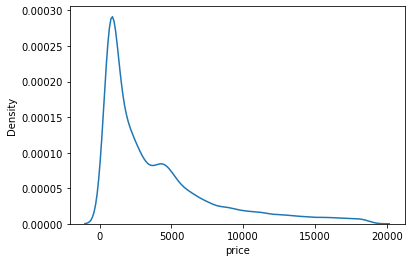

In [42]:
# Added 'hist' parameter
sns.distplot(df.price, hist=False)

<hr/>

<h3>Changing the bar color with <code>color='COLOR_NAME'</code> Parameter</h3>

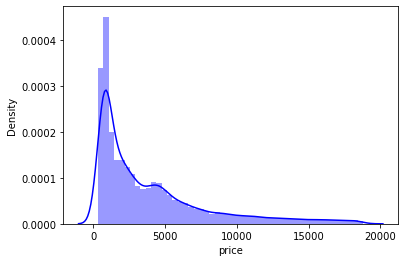

In [43]:
# Added the color 'blue' to the distplot:
sns.distplot(df.price, color='blue'); plt.show()

<hr/>

<h3>Plotting a histogram on a different axis</h3>

The `vertical = True` parameter allows you to plot the histogram on a vertical axis (left-to-right)

The `distplot()` caller is the only histogram (so far) that can be plotted on the vertical axis:

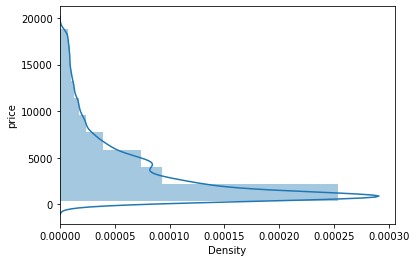

In [53]:
sns.distplot(df.price, kde=True, bins= 10, vertical=True)
plt.show()

<hr/>

<h2>2. Joint Plotting</h2>

A <b>Joint Plot</b> combines a scatterplot with a per-axis-histogram. The scatterplot takes center-stage in the visual while the distribution of data represented within the scatterplot is reflected on the outer-bounds of the graph by a histograph:

In [59]:
iris = pd.read_csv('https://gist.githubusercontent.com/netj/8836201/raw/6f9306ad21398ea43cba4f7d537619d0e07d5ae3/iris.csv')
iris.head()


,sepal.length,sepal.width,petal.length,petal.width,variety
0,5.1,3.5,1.4,0.2,Setosa
1,4.9,3.0,1.4,0.2,Setosa
2,4.7,3.2,1.3,0.2,Setosa
3,4.6,3.1,1.5,0.2,Setosa
4,5.0,3.6,1.4,0.2,Setosa


AttributeError: 'JointGrid' object has no attribute 'axes'

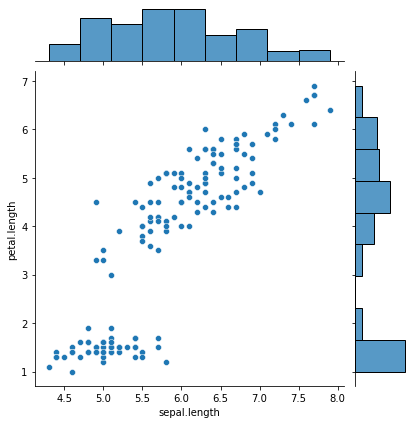

In [66]:
sns.jointplot(x='sepal.length', y='petal.length', data=iris).set(title='Joint Plot')
plt.show()

<h3>Adding Regression Lines</h3>

The parameter `kind=reg` adds a regression line to joint plot:

AttributeError: 'JointGrid' object has no attribute 'axes'

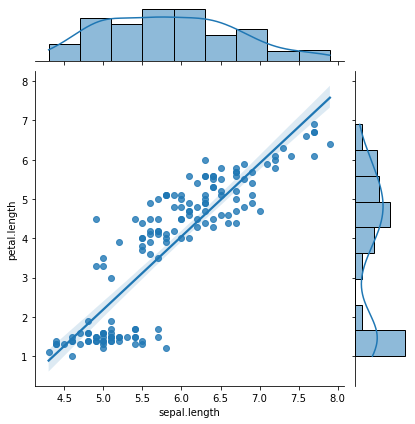

In [70]:
# Added regression line and 'rocket' palette:
sns.jointplot(x='sepal.length', y='petal.length', data=iris, kind='reg').set(title='Joint Plot')
plt.show()